In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

from model import Model
from image_preprocess import Preprocess

Using TensorFlow backend.


In [2]:
def summarize_prediction(Y_true, Y_pred):
    
    mse = mean_squared_error(Y_true, Y_pred)
    r_squared = r2_score(Y_true, Y_pred)
    
    print(f'mse       = {mse:.2}')
    print(f'r_squared = {r_squared:.2%}')
    print()
    
def predict_and_summarize(X, Y):
    model = load_model('.\models\model_final.h5')
    Y_pred = model.predict(X)
    Y_pred
    summarize_prediction(Y, Y_pred)
    return Y_pred

mse       = 0.002
r_squared = -0.02%



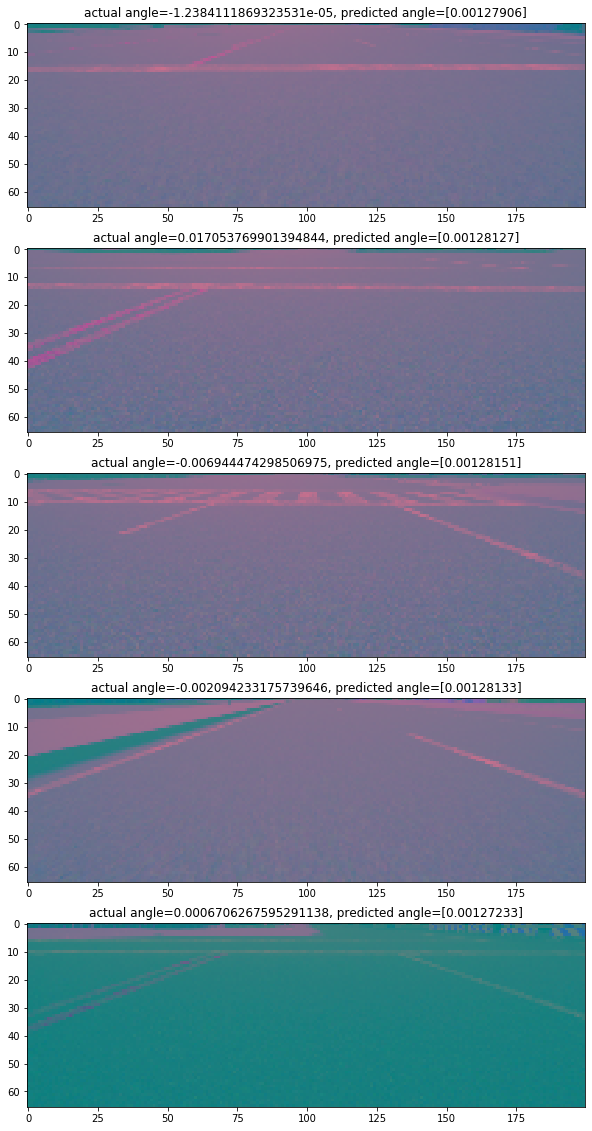

In [3]:
n_tests = 100
model = Model('C:\\Users\\\Teo\\\Desktop\\\data_10k\\', 0, 0, 0, 0)
X_train, X_valid, y_train, y_valid = model.splitData()
preprocess = Preprocess('C:\\Users\\\Teo\\\Desktop\\\data_10k\\\image_data\\')

X_test, y_test = next(preprocess.image_data_generator(X_valid, y_valid, 100, False))

y_pred = predict_and_summarize(X_test, y_test)

n_tests_show = 5
fig, axes = plt.subplots(n_tests_show, 1, figsize=(10, 4 * n_tests_show))
for i in range(n_tests_show):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"actual angle={y_test[i]}, predicted angle={y_pred[i]}")